# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

#### Analisis exploraotio de datos  & Percepciones clave
**Dataset:** aisles.csv, departments.csv, instacart_orders.csv, order_products.csv, products.csv  
**Author:** Luis Sergio Pastrana Lemus  
**Date:** 2025-05-04

#### 🎯 Objectivo

Understand the impact of different demographic and socio-economic factors (gender, parental education, lunch type, and test preparation) on student performance across math, reading, and writing exam scores.

Main question:  
> What are the key drivers behind student performance in academic tests?

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución
###### _LSPL_
1. Apertura e inspeccion visual para darse una idea general, si los archivos csv cuentan con que tipo de separador csv, nombres de columnas, formato de nombres de columnas, son consistentes en el numero de columnas y sus titulos, asi como reconocimiento de valores vacios, caracteres raros, valores numericos como strings, con caracteres especiales, etc. 
2. Revision general del dataset, verificar el tamaño, columnas y tipos de datos (int, float, string, datetime, etc.). Comprobar que el numero de filas tenga sentido respecto a lo esperado. 
3. Creacion de DataFrames a partir de la lectura de los archivos CSV.
4. Revision de la informacion de los Dataframes, composicion (tamaño), cantidad de valores nulos, dtypes.
5. Documentacion de cada paso, registro de transformaciones realizadas, esto ayuda a mantener la trazabilidad y reproducibilidad.

In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# Rutas Relativas a los archivos .csv
aisles_path = 'datasets/aisles.csv'
departments_path = 'datasets/departments.csv'
instacart_orders_path = 'datasets/instacart_orders.csv'
order_products_path = 'datasets/order_products.csv'
products_path = 'datasets/products.csv'

# Funcion que da estilo de formato para visualizacion de los DataFrames en Jupyter Notebook 
def zebra_rows(row):
    
    if row.name % 2 == 0:
        return ['background-color: #808080'] * len(row)  # 50% grey
    else:
        return ['background-color: #595959'] * len(row)  # 35% grey

# Funcion para mostrar valores unicos de las columnas de un DataFrame
def columns_unique_values(df):
    
    for col in df.columns:
        print(f"Columna: {col}")
        print(f"Valores únicos: {df[col].unique()} Total valores unicos: {df[col].nunique()}")
        print("-" * 50, '\n')

# Funcion para asignacion de valor <NA> a los valores nulos de un DataFrame
def null_value_apply(df):
    
    null_values = ['', ' ', '-', 'N/A', 'NA', 'NaN', 'nan', 'NULL', 'null', 'None', None]
    
    for col in df.columns:
        
        df[col] = df[col].replace(null_values, pd.NA)
                
    return df

# Funcion para la estandarizacion de valores String (snake_case, lower, strip, eliminacion de guiones medios)
def string_std(df):
        
    for col in df.columns:
            
        if df[col].dtype == 'object':
                
            df[col] = df[col].str.replace('-', '_').str.replace(' ', '_').str.lower().str.strip()
                
    return df

pd.set_option('display.max_rows', 25) # Mostrar 25 filas como máximo
pd.set_option('display.max_columns', 25) # Mostrar 10 columnas como máximo
pd.set_option('display.max_colwidth', 15) # show maximum 50 characters in each column
pd.set_option('display.width', 150) # Mostrar 150 caracteres como máximo

In [2]:
# Leer conjuntos de datos en los DataFrames
df_aisles = pd.read_csv(aisles_path, sep=';', header='infer', keep_default_na=False)
df_departments = pd.read_csv(departments_path, sep=';', header='infer', keep_default_na=False)
df_instacart_orders = pd.read_csv(instacart_orders_path, sep=';', header='infer', keep_default_na=False)
df_order_products = pd.read_csv(order_products_path, sep=';', header='infer', keep_default_na=False)
df_products = pd.read_csv(products_path, sep=';', header='infer', keep_default_na=False)

##### __Nota__ 
###### _LSPL_

Se utilizo `header='infer'`, ya que con la inspeccion visual de los archivos csv se identifico que los archivos contaban con el nombre de las columnas en la primera posicion de las filas.
Se utilizo `keep_default_na=False`, ya que posteriormente se piensa identificar,  modificar los valores nulos y reemplazarlo con el valor nulo `pd.NA` ya que este maneja tipos de datos mixtos, y operaciones comunes para la identificacion y eliminacion de valores nulos, adicionalmente que trabaja con strings, enteros y booleanos.

##### __Infromacion de los DataFrames__

In [3]:
# Mostrar información del DataFrame
print("*** Aisles DataFrame: \n")
df_aisles.info()
print('*' * 50, '\n')
print("*** Departments DataFrame:\n")
df_departments.info()
print('*' * 50, '\n')
print("*** Instacart Orders DataFrame:\n")
df_instacart_orders.info()
print('*' * 50, '\n')
print("*** Order Products DataFrame:\n")
df_order_products.info()
print('*' * 50, '\n')
print("*** Products DataFrame:\n")
df_products.info()
print('*' * 50, '\n')


*** Aisles DataFrame: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
************************************************** 

*** Departments DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes
************************************************** 

*** Instacart Orders DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------

##### __Nota__
###### _LSPL_
No sera necesario realizar ningun tipo de porcesamiento para el nombre de las columnas ya que estan estandarizadas, con minusculas, usando guion bajo para la separacion de los nombres compuestos (snake_case), no cuentan con espacios ni al inicio ni al final de cada nombre de columna. 

## Conclusiones
###### _LSPL_
El formato y valores del nombre de las columnas no requieren de modificacion.

Para la limpieza o preprocesamiento de valores de los DataFrames requeriran:

- Estandarizacion de formato a snake_case considerando espacion y guiones medios entre strings compuestos.
- Procesamiento de valores NULL
- Eliminacion de valores duplicados
- Procesamiento de valores string a numericos

La mayor parte de los valores de los Dataframe se puede considerar moderadamente correcta, sin mucha dificultad para preprocesarlos.


#### 🔍 Dataset Overview

- **Source:** aisles.csv
- **Rows:** 134 registros
- **Columns:** aisle_id, aisle
---------------------------------------
- **Source:** departments.csv
- **Rows:** 21 registros
- **Columns:** department_id, department
---------------------------------------
- **Source:** instacart_orders.csv
- **Rows:** 478967 registros
- **Columns:** order_id, user_id, order_number, order_dow, order_hour_of_day, day_since_prior_order
---------------------------------------
- **Source:** order_products.csv
- **Rows:** 134 registros
- **Columns:** order_id, product_id, add_to_cart_order, reordered
---------------------------------------
- **Source:** products.csv
- **Rows:** 49694 registros
- **Columns:** product_id, product_name, aise_id, department_id
---------------------------------------
Chequeos iniciales:
- Valores ausentes
- Duplicados explicitos
- Normalizacion a formato snake_case

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución
###### _LSPL_
1. Manejo de valores faltantes: Identificar valores nulos ('', ' ', '-', NaN, None, celdas vacías).

2. Analisis y decision para: Eliminacion filas o columnas con muchos valores faltantes. Reemplazo (con media, mediana, 0's, etc.). Mantener si tienen algún significado.

3. Deteccion de duplicados: Eliminacion filas duplicadas con duplicado explicitos. Revision y correccion para duplicados implicitos (errores tipograficos).

4. Consistencia en los formatos: Asegurar valores de fechas esten en el mismo formato. Estandarizacion de categorias que esten escritas diferente (ej. "Femenino", "femenina", "Mujer" → "F"). Conversion datos a los tipos correctos (str, datetime, int, etc.).

5. Verificacion de codificación y caracteres especiales: Revison de existencia de caracteres raros, espacios ocultos.

6. Documentacion de cada paso: Registro de transformaciones realizadas. Esto ayuda a mantener la trazabilidad y reproducibilidad.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `instacart orders` data frame

In [4]:
# Revisa si hay pedidos duplicados
print("*** DataFrame [Instacart Orders], cantidad de valores duplicados explicitos: \n")
print(f"Duplicados explicitos: {df_instacart_orders.duplicated().sum()}")
print()
print("DataFrame [Instacart Orders], valores duplicados explicitos: \n") 
df_view = df_instacart_orders.loc[df_instacart_orders.duplicated()] # keep=False # Muestra todos los duplicados y no solo los duplicados unicos
display(df_view.style.apply(zebra_rows, axis=1))



*** DataFrame [Instacart Orders], cantidad de valores duplicados explicitos: 

Duplicados explicitos: 15

DataFrame [Instacart Orders], valores duplicados explicitos: 



,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?
###### _LSPL_
Se tienen 15 filas duplicadas, las cuales son duplicados explicitos (los valores de la fila para todas las columnas son iguales al de otras filas).
Son pedidos que se hicieron el dia 3 a las 2 am.

In [5]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
print("*** DataFrame [Instacart Orders], pedidos realizados el dia 3 a las 2 am: \n")
df_view = df_instacart_orders.loc[(df_instacart_orders['order_hour_of_day'] == 2)  & (df_instacart_orders['order_dow'] == 3), :]
display(df_view.sample(25).style.apply(zebra_rows, axis=1))
print(f"Numero total de filas (ordenes del dia 3 a las 2 am): {((df_instacart_orders['order_hour_of_day'] == 2)  & (df_instacart_orders['order_dow'] == 3)).shape[0]}")


*** DataFrame [Instacart Orders], pedidos realizados el dia 3 a las 2 am: 



,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
321100,408114,68324,4,3,2,18.0
200059,1782114,106752,1,3,2,
318152,2893503,29103,26,3,2,19.0
108281,2218116,35918,9,3,2,8.0
136476,3155527,131042,8,3,2,30.0
70443,2027608,15574,8,3,2,17.0
224999,1525566,85622,27,3,2,7.0
186739,2025848,44593,6,3,2,30.0
113422,1353704,178429,3,3,2,30.0
188541,404972,144464,2,3,2,19.0


Numero total de filas (ordenes del dia 3 a las 2 am): 478967


¿Qué sugiere este resultado?

In [6]:
# Elimina los pedidos duplicados explicitos
df_instacart_orders = df_instacart_orders.drop_duplicates().reset_index(drop=True)

In [7]:
# Vuelve a verificar si hay filas duplicadas
print("*** DataFrame [Instacart Orders], cantidad de valores duplicados explicitos despues de la remocion de duplicados explicitos: \n")
print(f"Duplicados explicitos actuales: {df_instacart_orders.duplicated().sum()}")

*** DataFrame [Instacart Orders], cantidad de valores duplicados explicitos despues de la remocion de duplicados explicitos: 

Duplicados explicitos actuales: 0


In [8]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print("*** DataFrame [Instacart Orders], columna 'order_id', cantidad de valores duplicados explicitos:\n")
print(f"Duplicados explicitos: {df_instacart_orders['order_id'].duplicated().sum()}")

*** DataFrame [Instacart Orders], columna 'order_id', cantidad de valores duplicados explicitos:

Duplicados explicitos: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos
###### _LSPL_
De 478967 ordenes realizadas el dia 3 a las 2 am, se encontraron 15 filas explicitamente duplicadas, las cuales fueron eliminadas.

### `products` data frame

In [9]:
# Verifica si hay filas totalmente duplicadas
print("*** DataFrame [Products], cantidad de valores duplicados explicitos: \n")
print(f"Duplicados explicitos: {df_products.duplicated().sum()}")

*** DataFrame [Products], cantidad de valores duplicados explicitos: 

Duplicados explicitos: 0


In [10]:
# Revisa únicamente si hay ID de departamentos duplicados
print("*** DataFrame [Products], columna 'department_id', cantidad de valores duplicados explicitos: \n")
print(f"Duplicados explicitos: {df_products['department_id'].duplicated().sum()}")
print(f"Valores unicos: {df_products['department_id'].unique()}, Total valores unicos: {df_products['department_id'].nunique()}")


*** DataFrame [Products], columna 'department_id', cantidad de valores duplicados explicitos: 

Duplicados explicitos: 49673
Valores unicos: [19 13  7  1 11 16 17 18 12  9  8 14 15  4 21  6 20  5  3  2 10], Total valores unicos: 21


In [11]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
print("*** DataFrame [Products], columna 'product_name', cantidad de valores duplicados explicitos: \n")
print(f"Duplicados explicitos: {df_products['product_name'].str.upper().duplicated().sum()}")
print(f"Valores unicos: {df_products['product_name'].str.upper().unique()}, Total valores unicos: {df_products['product_name'].str.upper().nunique()}")

*** DataFrame [Products], columna 'product_name', cantidad de valores duplicados explicitos: 

Duplicados explicitos: 1361
Valores unicos: ['CHOCOLATE SANDWICH COOKIES' 'ALL-SEASONS SALT'
 'ROBUST GOLDEN UNSWEETENED OOLONG TEA' ... 'ARTISAN BAGUETTE'
 'SMARTBLEND HEALTHY METABOLISM DRY CAT FOOD' 'FRESH FOAMING CLEANSER'], Total valores unicos: 48333


In [12]:
# Revisa si hay nombres duplicados de productos no faltantes
df_products_missing = pd.read_csv(products_path, sep=';', header='infer', keep_default_na=True)
df_products_missing['product_name'] = df_products_missing['product_name'].fillna('MISSING')

print("*** DataFrame [Products], columna 'product_name', valores duplicados explicitos sin valores ausentes \n")
print(f"Duplicados explicitos (Sin valores ausente): {df_products_missing.loc[df_products_missing['product_name'] != "MISSING", 'product_name'].duplicated().sum()}")
print('*' * 50, '\n')
print("DataFrame [Products], columna 'product_name', valores duplicados explicitos con valores ausentes \n")
print(f"Duplicados explicitos (Con valores ausentes): {df_products_missing.loc[df_products_missing['product_name'] == "MISSING", 'product_name'].duplicated().sum()}")
print('*' * 50, '\n')



*** DataFrame [Products], columna 'product_name', valores duplicados explicitos sin valores ausentes 

Duplicados explicitos (Sin valores ausente): 0
************************************************** 

DataFrame [Products], columna 'product_name', valores duplicados explicitos con valores ausentes 

Duplicados explicitos (Con valores ausentes): 1257
************************************************** 



Describe brevemente tus hallazgos y lo que hiciste con ellos.
###### _LSPL_
El DataFrame products, no cuenta con valores duplicados explicitos, sin embargo, cuenta con varios valores ausentes en la columna 'product_name'.
Estos no se eliminaran ya que solo son valores duplicados explicitos en la columna 'product_name', se procesaran mas adelante como valores ausentes.

### `departments` data frame

In [13]:
# Revisa si hay filas totalmente duplicadas
print("*** DataFrame [Departments], cantidad de valores duplicados explicitos: \n")
print(f"Duplicados explicitos: {df_departments.duplicated().sum()}")

*** DataFrame [Departments], cantidad de valores duplicados explicitos: 

Duplicados explicitos: 0


In [14]:
# Revisa únicamente si hay IDs duplicadas de departamentos
print("*** DataFrame [Departments], columna 'department_id', cantidad de valores duplicados explicitos: \n")
print(f"Duplicados explicitos: {df_departments['department_id'].duplicated().sum()}")


*** DataFrame [Departments], columna 'department_id', cantidad de valores duplicados explicitos: 

Duplicados explicitos: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.
###### _LSPL_
El DataFrame departments, no cuenta con valores duplicados explicitos.

### `aisles` data frame

In [15]:
# Revisa si hay filas totalmente duplicadas
print("*** DataFrame [Aisles], cantidad de valores duplicados explicitos: \n")
print(f"Duplicados explicitos: {df_aisles.duplicated().sum()}")

*** DataFrame [Aisles], cantidad de valores duplicados explicitos: 

Duplicados explicitos: 0


In [16]:
# Revisa únicamente si hay IDs duplicadas de pasillos
print("*** DataFrame [Aisles], columna 'aisle_id' cantidad de valores duplicados explicitos: \n")
print(f"Duplicados explicitos: {df_aisles['aisle_id'].duplicated().sum()}")

*** DataFrame [Aisles], columna 'aisle_id' cantidad de valores duplicados explicitos: 

Duplicados explicitos: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.
###### _LSPL_
El DataFrame aisles, no cuenta con valores duplicados explicitos.

### `order_products` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
print("*** DataFrame [Order products], cantidad de valores duplicados explicitos: \n")
print(f"Duplicados explicitos: {df_order_products.duplicated().sum()}")

*** DataFrame [Order products], cantidad de valores duplicados explicitos: 

Duplicados explicitos: 0


In [18]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
df_order_products_missing = pd.read_csv(order_products_path, sep=';', header='infer', keep_default_na=True)
df_order_products_missing['add_to_cart_order'] = df_order_products_missing['add_to_cart_order'].fillna('MISSING')

print("*** DataFrame [Order products], columna 'add_to_cart_order', cantidad de valores duplicados explicitos sin valores ausentes: \n")
print(f"Duplicados (Sin valores ausente): {df_order_products_missing.loc[df_order_products_missing['add_to_cart_order'] != "MISSING", 'add_to_cart_order'].duplicated().sum()}")
print('*' * 50, '\n')
print("*** DataFrame [Order products], columna 'add_to_cart_order', cantidad de valores duplicados explicitos con valores ausentes: \n")
print(f"Duplicados (Con valores ausentes): {df_order_products_missing.loc[df_order_products_missing['add_to_cart_order'] == "MISSING", 'add_to_cart_order'].duplicated().sum()}")
print('*' * 50, '\n')

*** DataFrame [Order products], columna 'add_to_cart_order', cantidad de valores duplicados explicitos sin valores ausentes: 

Duplicados (Sin valores ausente): 4544107
************************************************** 

*** DataFrame [Order products], columna 'add_to_cart_order', cantidad de valores duplicados explicitos con valores ausentes: 

Duplicados (Con valores ausentes): 835
************************************************** 



Describe brevemente tus hallazgos y lo que hiciste con ellos.
###### _LSPL_
El DataFrame order_products, cuenta con valores duplicados explicitos no ausentes en la columna 'add_to_cart_order' y ademas cuenta con varios valores ausentes ausentes en la columna 'add_to_cart_order'. Las columnas 'add_to_cart_order' y 'reorder_id', se esperan valores duplicados ya que cada pedido para estas dos columnas, sus valores pueden repetirse, por representar el orden del pedido de cada producto y si este ha sido pedido nuevamente o no con unicos valors ('0' o '1').Estos no se eliminaran ya que solo son valores duplicados explicitos en la columna 'add_to_cart_order', los valores ausentes se procesaran mas adelante.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

##### __Nota__
###### _LSPL_
Como se uso _df = pd.read_csv('path', sep=';', header='infer', `keep_default_na=False`)_, los valores _NA_ que son detectados por default por pandas se quedan como el texto original dentro del DataFrame. Para que despues estos sean procesados como `pd.NA`. Ya que `pd.NA` maneja tipos de datos mixtos, y operaciones comunes para la identificacion y eliminacion de valores nulos, adicionalmente que trabaja con strings, enteros y booleanos.

In [19]:
# Mostrar información del DataFrame para posibles valores nulos ('', ' ', '-', 'N/A', 'NA', 'NaN', 'nan', 'NULL', 'null', 'None', None)

print("*** DataFrame [Aisles], valores ausentes por columna: \n")
columns_unique_values(df_aisles)
print()
print("*** DataFrame [Departments], valores ausentes por columna: \n")
columns_unique_values(df_departments)
print()
print("*** DataFrame [Instacart Orders], valores ausentes por columna: \n")
columns_unique_values(df_instacart_orders)
print()
print("*** DataFrame [Order Products], valores ausentes por columna: \n")
columns_unique_values(df_order_products)
print()
print("*** DataFrame [Products], valores ausentes por columna: \n")
columns_unique_values(df_products)

*** DataFrame [Aisles], valores ausentes por columna: 

Columna: aisle_id
Valores únicos: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134] Total valores unicos: 134
-------------------------------------------------- 

Columna: aisle
Valores únicos: ['prepared soups salads' 'specialty cheeses' 'energy granola bars'
 'instant foods' 'marinades meat preparation' 'other' 'packaged meat'
 'bakery desserts' 'pasta sauce' 'kitchen supplies' 'cold flu allergy'
 'fresh pasta' 'prepared meals' 'tofu meat alte

In [20]:
# Identificacion y correcion de valores Null a pd.NA

# Se llama a la funcion 'def null_value_apply(df)' para el reemplazo de valores ausentes por pd.NA
null_value_apply(df_aisles)
null_value_apply(df_departments)
null_value_apply(df_instacart_orders)
null_value_apply(df_order_products)
null_value_apply(df_products)

# Mostrar cantidad de valores ausentes en formato pd:NA
print("*** DataFrame [Aisle], cantidad de valores ausentes <NA>: \n", df_aisles.isna().sum())
print('*' * 50, '\n')
print("Data Frame [Departments], cantidad de valores ausentes <NA>: \n", df_departments.isna().sum())
print('*' * 50, '\n')
print("Data Frame [Instacart orders], cantidad de valores ausentes <NA>:\n", df_instacart_orders.isna().sum())
print('*' * 50, '\n')
print("Data Frame [Order products], cantidad de valores ausentes <NA>: \n", df_order_products.isna().sum())
print('*' * 50, '\n')
print("Data Frame [Products], cantidad de valores ausentes <NA>: \n", df_products.isna().sum())
print('*' * 50, '\n')
print("\n\n")


print("*** DataFrame [Instacart Orders], valores ausentes debidamene identificados como <NA>: \n")
#Llamada a la funcion 'def columns_unique_values(df)' para mostrar los valores unicos de las columnas del DataFrame 
columns_unique_values(df_instacart_orders)
print("Data Frame [Instacart orders], cantidad de valores ausentes: \n", df_instacart_orders.isna().sum())
print('*' * 50, '\n')
print()

print("*** DataFrame [Order Products], valores ausentes debidamene identificados como <NA>:  \n")
# Llamada a la funcion 'def columns_unique_values(df)' para mostrar los valores unicos de las columnas del DataFrame 
columns_unique_values(df_order_products)
print()
print("Data Frame [Order Products], cantidad de valores ausentes: \n", df_order_products.isna().sum())
print('*' * 50, '\n')
print()

print("*** DataFrame [Products], valores ausentes debidamene identificados como <NA>:: \n")
# Llamada a la funcion 'def columns_unique_values(df)' para mostrar los valores unicos de las columnas del DataFrame 
columns_unique_values(df_products)
print("Data Frame [Products], cantidad de valores ausentes: \n", df_products.isna().sum())
print('*' * 50, '\n')


*** DataFrame [Aisle], cantidad de valores ausentes <NA>: 
 aisle_id    0
aisle       0
dtype: int64
************************************************** 

Data Frame [Departments], cantidad de valores ausentes <NA>: 
 department_id    0
department       0
dtype: int64
************************************************** 

Data Frame [Instacart orders], cantidad de valores ausentes <NA>:
 order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64
************************************************** 

Data Frame [Order products], cantidad de valores ausentes <NA>: 
 order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64
************************************************** 

Data Frame [Products], cantidad de valores ausentes <NA>: 
 product_id          0
product_name     1258
aisle_id          

##### __Nota__
###### _LSPL_
Valores ausentes en:

Data Frame [Instacart orders], columna 'days_since_prior_order'

Data Frame [Order products], columna 'add_to_cart_order'

Data Frame [Products], columna 'product_name'


### `products` data frame

In [21]:
# Encuentra los valores ausentes en la columna 'product_name'
print("*** DataFrame [Products], columna 'product_name', valores ausentes debidamene identificados como <NA>: ")
print(df_products['product_name'].value_counts(dropna=False))
print()
df_view = df_products.loc[df_products['product_name'].isna(), :]
display(df_view.sample(25).style.apply(zebra_rows, axis=1))

*** DataFrame [Products], columna 'product_name', valores ausentes debidamene identificados como <NA>: 
product_name
<NA>                                                                 1258
Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce       1
Green Chile Anytime Sauce                                               1
Porto                                                                   1
Small & Medium Dental Dog Treats                                        1
                                                                     ... 
HIGH PERFORMANCE ENERGY DRINK                                           1
ORIGINAL PANCAKE & WAFFLE MIX                                           1
ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR                         1
SPRING WATER BODY WASH                                                  1
Robust Golden Unsweetened Oolong Tea                                    1
Name: count, Length: 48437, dtype: int64



,product_id,product_name,aisle_id,department_id
45021,45022,,100,21
25965,25966,,100,21
30525,30526,,100,21
2506,2507,,100,21
39521,39522,,100,21
35815,35816,,100,21
3449,3450,,100,21
44255,44256,,100,21
47250,47251,,100,21
36508,36509,,100,21


Describe brevemente cuáles son tus hallazgos.
###### _LSPL_
De acuerdo a la busqueda de valores ausentes y al muestreo de las filas con valores ausentes en DataFrame [Products], columna 'product_name' confirmamos la existen 1258 valores ausentes

In [22]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
df_view = df_products.loc[(df_products['product_name'].isna()) & (df_products['aisle_id'] != 100), :]

if len(df_view) != 0:
    print(df_view.sample(25).style.apply(zebra_rows, axis=1))
else:
    print("No hay filas con valores nulos en columna 'aisle_id' diferente a 100")

No hay filas con valores nulos en columna 'aisle_id' diferente a 100


Describe brevemente cuáles son tus hallazgos.
###### _LSPL_
De acuerdo a la busqueda de valores ausentes y al muestreo de las filas con valores ausentes en DataFrame [Products], columna 'product_name' confirmamos que no existen valores ausentes fuera del pasillo 100.

In [23]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
df_view = df_products.loc[(df_products['product_name'].isna()) & (df_products['department_id'] != 21), :]

if len(df_view) != 0:
    print(df_view.sample(25).style.apply(zebra_rows, axis=1))
else:
    print("No hay filas con valores nulos en columna 'department_id' diferente a 21")

No hay filas con valores nulos en columna 'department_id' diferente a 21


Describe brevemente cuáles son tus hallazgos.
###### _LSPL_
De acuerdo a la busqueda de valores ausentes y al muestreo de las filas con valores ausentes en DataFrame [Products], columna 'productname' confirmamos que no existen valores ausentes fuera del departamento 21.

In [24]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
# LSPL
# Ya fue mostrado previamente en la vista resultante de la indexacion booleana df_products['product_name'].isna()

Describe brevemente cuáles son tus hallazgos.
###### _LSPL_
Al parecer Instacart_orders usa el departamento_ID 21 y pasillo 100, para productos que no tienen nombre, aun cuando tienen un id de producto. Esto se podria confirmarse con Instacart para saber si estos productos son reelevantes, si podrian identificarse de alguna manera para poder corregir el nombre y aquellos que no se puedan identificar, eliminarlos. Mientras tanto se identificaran con el valor 'Unknown'.

In [25]:
# Completa los nombres de productos ausentes con 'Unknown'
df_products['product_name'] = df_products['product_name'].fillna('Unknown')
print("*** DataFrame [Products], columna 'product_name' valores ausentes reemplazados por 'Unknown': ")
df_products['product_name'].value_counts(dropna=False)

*** DataFrame [Products], columna 'product_name' valores ausentes reemplazados por 'Unknown': 


product_name
Unknown                                                              1258
Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce       1
Green Chile Anytime Sauce                                               1
Porto                                                                   1
Small & Medium Dental Dog Treats                                        1
                                                                     ... 
HIGH PERFORMANCE ENERGY DRINK                                           1
ORIGINAL PANCAKE & WAFFLE MIX                                           1
ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR                         1
SPRING WATER BODY WASH                                                  1
Robust Golden Unsweetened Oolong Tea                                    1
Name: count, Length: 48437, dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.
###### _LSPL_

Se encontraron en DataFrame [Products], columna 'product_name' 1258 valores ausentes, los cuales se reemplazaron por 'Unknown'. 

### `instacart orders` data frame

In [26]:
# Encuentra los valores ausentes
print("*** DataFrame [Instacart orders], columna 'days_since_prior_order' valores ausentes debidamene identificados como <NA>: ")
print(df_instacart_orders['days_since_prior_order'].value_counts(dropna=False), "\n")
print("Valores ausentes: ", df_instacart_orders['days_since_prior_order'].isna().sum())
print()
df_view = df_instacart_orders.loc[df_instacart_orders['days_since_prior_order'].isna(), :]
display(df_view.sample(25).style.apply(zebra_rows, axis=1))

*** DataFrame [Instacart orders], columna 'days_since_prior_order' valores ausentes debidamene identificados como <NA>: 
days_since_prior_order
30.0    51337
7.0     44577
6.0     33930
4.0     31006
3.0     30224
        ...  
24.0     3015
27.0     2986
25.0     2711
29.0     2673
26.0     2640
Name: count, Length: 32, dtype: int64 

Valores ausentes:  28817



,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
254913,2696408,20258,1,0,14,
104055,1379226,24283,1,5,18,
123334,2583241,187833,1,6,7,
101056,3372086,3048,1,1,15,
377260,1284771,20792,1,3,7,
14793,2086598,6,1,5,18,
107484,2146571,104337,1,0,21,
29966,1766660,88260,1,3,8,
440348,159455,131582,1,4,6,
176682,278474,170418,1,0,16,


In [27]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?

# Filtrar los pedidos que no son el primer pedido
df_orders_wo_first_order = df_instacart_orders.loc[df_instacart_orders['order_number'] != 1, :]
# Buscar si hay valores ausentes en columna 'days_since_prior_order'
null_values = df_orders_wo_first_order['days_since_prior_order'].isna().any()
print("Existen valores ausentes que no sean el primer pedido: ", null_values)

Existen valores ausentes que no sean el primer pedido:  False


Describe brevemente tus hallazgos y lo que hiciste con ellos.
###### _LSPL_
Se identificaron 28817 valores ausentes en la columna 'days_since_prior_order', se identifico que los valores ausentes en dicha columna ocurrian solamente durante el primer numero de orden; los valores en la columna 'days_since_prior_order' pueden tener valores ausentes, si es el primer pedido porque el primer pedido no tiene pedido anterior, pero no deberian tener valores ausentes si no es el primer pedido. Por lo que estos valores ausentes son esperados y no deberian modificarse por que cumplen con la logica del negocio.

### `order_products` data frame

In [28]:
# Encuentra los valores ausentes
print("*** DataFrame [Order products], columna 'add_to_cart_order' valores ausentes debidamene identificados como <NA>: ")
print(df_order_products['add_to_cart_order'].value_counts(dropna=False), "\n")
print("Valores ausentes: ", df_order_products['add_to_cart_order'].isna().sum())
print()
df_view = df_order_products.loc[df_order_products['add_to_cart_order'].isna(), :]
display(df_view.sample(25).style.apply(zebra_rows, axis=1))

*** DataFrame [Order products], columna 'add_to_cart_order' valores ausentes debidamene identificados como <NA>: 
add_to_cart_order
1.0     450046
2.0     428199
3.0     401907
4.0     372861
5.0     341807
         ...  
60.0       127
61.0       114
62.0        98
63.0        87
64.0        75
Name: count, Length: 65, dtype: int64 

Valores ausentes:  836



,order_id,product_id,add_to_cart_order,reordered
1514664,2470674,35004,,0
1255540,61355,32550,,0
3300473,2094761,41259,,0
410035,1959075,43182,,1
539603,293169,11452,,0
2457603,404157,28601,,1
4365834,2625444,3096,,0
1702593,61355,3390,,0
1739943,1730767,4431,,1
846464,1477139,24294,,1


In [29]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print("*** DataFrame [Order products], columna 'add_to_cart_order', valores minimos y maximos: \n")
print(pd.to_numeric(df_order_products['add_to_cart_order'], errors='coerce').astype('Float64').describe(include='all'))

print()

for column in df_order_products:
    
    if column != 'add_to_cart_order':
        print(f"Valor minimo para columna {column}: {df_order_products[column].min()}, Valor maximo para columna {column}: {df_order_products[column].max()}")

*** DataFrame [Order products], columna 'add_to_cart_order', valores minimos y maximos: 

count    4544171.0
mean      8.351669
std       7.080368
min            1.0
25%            3.0
50%            6.0
75%           11.0
max           64.0
Name: add_to_cart_order, dtype: Float64

Valor minimo para columna order_id: 4, Valor maximo para columna order_id: 3421079
Valor minimo para columna product_id: 1, Valor maximo para columna product_id: 49694
Valor minimo para columna reordered: 0, Valor maximo para columna reordered: 1


Describe brevemente cuáles son tus hallazgos.
###### _LSPL_

Se encontraron en DataFrame [Order products], columna 'add_to_cart_order' 836 valores ausentes, el valor minio de las columnas corresponden a la logica de negocio.

In [30]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
missing_ordr_ids = df_order_products.loc[df_order_products['add_to_cart_order'].isna(), 'order_id'].unique()
print(missing_ordr_ids)

[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [31]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
df_op_na = df_order_products.loc[df_order_products['add_to_cart_order'].isna(), :]

print("¿Todos los pedidos con valores ausentes tienen más de 64 productos?", (df_op_na.groupby('order_id')['product_id'].count() > 64).all())
print()

# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
df_oid_na = df_op_na.groupby('order_id')

# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
print("Cantidades de productos en cada pedido con valores ausentes en columna 'add_to_cart_order': \n", df_oid_na['product_id'].count())
print("Valor minimo de productos en cada pedido con valores ausentes en columna 'add_to_cart_order': ", df_oid_na['product_id'].count().min())

¿Todos los pedidos con valores ausentes tienen más de 64 productos? False

Cantidades de productos en cada pedido con valores ausentes en columna 'add_to_cart_order': 
 order_id
9310        1
61355      63
102236     31
129627      5
165801      6
           ..
2999801     6
3125735    22
3308010    51
3347453     7
3383594     5
Name: product_id, Length: 70, dtype: int64
Valor minimo de productos en cada pedido con valores ausentes en columna 'add_to_cart_order':  1


Describe brevemente cuáles son tus hallazgos.
###### _LSPL_
No encuentro una lógica de negocio directa entre esas columnas basandose solo en la informacion analizada, los valores ausentes en la columna 'add_to_cart_order', podrian significar que el dato no fue capturado correctamente, el pedido fue generado de otra forma(reordenado automatico), o un error en el sistema.

In [32]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_order_products['add_to_cart_order'] = pd.to_numeric(df_order_products['add_to_cart_order'], errors='coerce').fillna(999).astype('int64')
print("*** DataFrame [Order products], columna 'add_to_cart_order' tipo de datos: ", df_order_products['add_to_cart_order'].dtypes)
print()
print("DataFrame [Order products], columna 'add_to_cart_order' valores unicos: \n", df_order_products['add_to_cart_order'].unique())

*** DataFrame [Order products], columna 'add_to_cart_order' tipo de datos:  int64

DataFrame [Order products], columna 'add_to_cart_order' valores unicos: 
 [ 17   1  35   5   4  10  14   2  28   3  16   8   7   6   9  15  22  49
  19  13  11  12  18  24  23  45  30  31  29  21  38  20  57  58  26  25
  39  34  40  27 999  43  33  42  50  32  36  37  61  46  56  41  44  55
  54  47  63  48  60  62  53  59  52  51  64]


Describe brevemente tus hallazgos y lo que hiciste con ellos.
###### _LSPL_
Se identificaron 836 valores ausentes en la columna 'add_to_cart_order', La cantidad de productos con valores ausentes no tiene una relacion directa entre cantidad de productos y ausencia en 'add_to_cart_order', el hecho de que tengan pocos o muchos productos no depende si 'add_to_cart_order' contenga valores ausentes o no. Podrian faltar otras variables externas: ¿cómo se hizo el pedido? ¿por app? ¿por web? ¿por reorden automático? ¿por asistencia?

##### __Nota__
###### _LSPL_
Adicionalmente me permito corregir lo siguiente:

Se encontraron strings con espacios en nombres compuestos, estandarizar formato a snake_case.
- DataFrame [Aisles] columna 'aisle'
- DataFrame [Departments] columna 'departmen'

Se encontraron valores cuantitativos como categoricos, convertirlos a tipo numeric
- DataFrame [Instacart orders] columna 'days_since_prior_order' 

Se encontraron strings con espacios y '-' en nombres compuestos, estandarizar formato a snake_case.
- DataFrame [Products] columna 'product_name'


In [33]:
# Estandarizacion de formato de valores string para cada columna de los DataFrames que sen de dType 'object'
# Se llama la funicion def string_std(df) para el procesamiento de los valores string para aplicar formato
df_aisles = string_std(df_aisles)
df_departments = string_std(df_departments)
df_products = string_std(df_products)

display(df_aisles.sample(25).style.apply(zebra_rows, axis=1))
print()
display(df_departments.head(25).style.apply(zebra_rows, axis=1))
print()
display(df_products.sample(25).style.apply(zebra_rows, axis=1))

# Validar si  DataFrame [instacart orders] columna 'days_since_prior_order' contiene valores numericos u objeto
print(f"DataFrame [Instacart orders] columna 'days_since_prior_order' dtypes:\n {df_instacart_orders.dtypes}\n")
print(df_instacart_orders['days_since_prior_order'].unique())
print()
df_instacart_orders['days_since_prior_order'] = pd.to_numeric(df_instacart_orders['days_since_prior_order'], errors='coerce')
df_instacart_orders['days_since_prior_order'] = df_instacart_orders['days_since_prior_order'].fillna(0)
df_instacart_orders['days_since_prior_order'] = df_instacart_orders['days_since_prior_order'].astype('int64')
print(df_instacart_orders['days_since_prior_order'].unique())


,aisle_id,aisle
42,43,buns_rolls
83,84,milk
101,102,baby_bath_body_care
17,18,bulk_dried_fruits_vegetables
3,4,instant_foods
18,19,oils_vinegars
66,67,fresh_dips_tapenades
127,128,tortillas_flat_bread
105,106,hot_dogs_bacon_sausage
33,34,frozen_meat_seafood


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry_goods_pasta
9,10,bulk


,product_id,product_name,aisle_id,department_id
23923,23924,extra_clear_for_sensitive_skin_nasal_strips,118,11
39842,39843,fabric_refresher___tide_original,75,17
29055,29056,acme_smoked_nova_salmon_brooklyn_classic,15,12
13866,13867,crumbled_gorgonzola,21,16
49553,49554,roasted_garlic_hommus,67,20
398,399,organic_strawberry_lemon_ade,31,7
30646,30647,oven_roasted_shaved_white_turkey,96,20
41444,41445,organic_vanilla_raw_protein,65,11
18235,18236,annatto_seed__organic,104,13
45595,45596,smart_start_original_antioxidants_cereal,121,14


DataFrame [Instacart orders] columna 'days_since_prior_order' dtypes:
 order_id                   int64
user_id                    int64
order_number               int64
order_dow                  int64
order_hour_of_day          int64
days_since_prior_order    object
dtype: object

['30.0' '9.0' '2.0' '10.0' '17.0' '15.0' '22.0' '4.0' '8.0' '3.0' '12.0'
 '11.0' '7.0' '1.0' '5.0' '6.0' '14.0' <NA> '20.0' '16.0' '24.0' '23.0'
 '27.0' '13.0' '0.0' '28.0' '21.0' '25.0' '19.0' '18.0' '29.0' '26.0']

[30  9  2 10 17 15 22  4  8  3 12 11  7  1  5  6 14  0 20 16 24 23 27 13
 28 21 25 19 18 29 26]


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos
###### _LSPL_
La limpieza de datos representa una etapa crítica en cualquier proyecto de análisis o ciencia de datos, ya que establece la base sobre la cual se realizarán todas las interpretaciones y decisiones posteriores. Gestionar valores ausentes, asegurar la correcta tipificación de datos cuantitativos y categóricos, y eliminar duplicados explícitos e implícitos son tareas fundamentales que permiten construir datasets sólidos y confiables.
Un análisis basado en datos sucios genera resultados erróneos; un análisis sobre datos limpios produce conclusiones precisas, útiles y defendibles.
La calidad del análisis es tan buena como la calidad de los datos en los que se basa.

#### 📊 Perspectivas exploratorias clave

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [34]:
print(f"Valor minimo de DataFrame [Instacart orders], columna 'order_hour_of_day': {df_instacart_orders['order_hour_of_day'].min()}")
print(f"Valor maximo de DataFrame [Instacart orders], columna 'order_hour_of_day': {df_instacart_orders['order_hour_of_day'].max()}")
print(f"Valores unicos de DataFrame [Instacart orders], columna 'order_hour_of_day': {df_instacart_orders['order_hour_of_day'].unique()}")
print()
print(f"Valor minimo de DataFrame [Instacart orders], columna 'order_dow': {df_instacart_orders['order_dow'].min()}")
print(f"Valor maximo de DataFrame [Instacart orders], columna 'order_dow': {df_instacart_orders['order_dow'].max()}")
print(f"Valores unicos de DataFrame [Instacart orders], columna 'order_dow': {df_instacart_orders['order_dow'].unique()}")

Valor minimo de DataFrame [Instacart orders], columna 'order_hour_of_day': 0
Valor maximo de DataFrame [Instacart orders], columna 'order_hour_of_day': 23
Valores unicos de DataFrame [Instacart orders], columna 'order_hour_of_day': [13 12 19 20 11  8 18 15 16  9 22 10  0 14 17  1  7  6  2 21  3 23  5  4]

Valor minimo de DataFrame [Instacart orders], columna 'order_dow': 0
Valor maximo de DataFrame [Instacart orders], columna 'order_dow': 6
Valores unicos de DataFrame [Instacart orders], columna 'order_dow': [6 5 0 4 3 1 2]


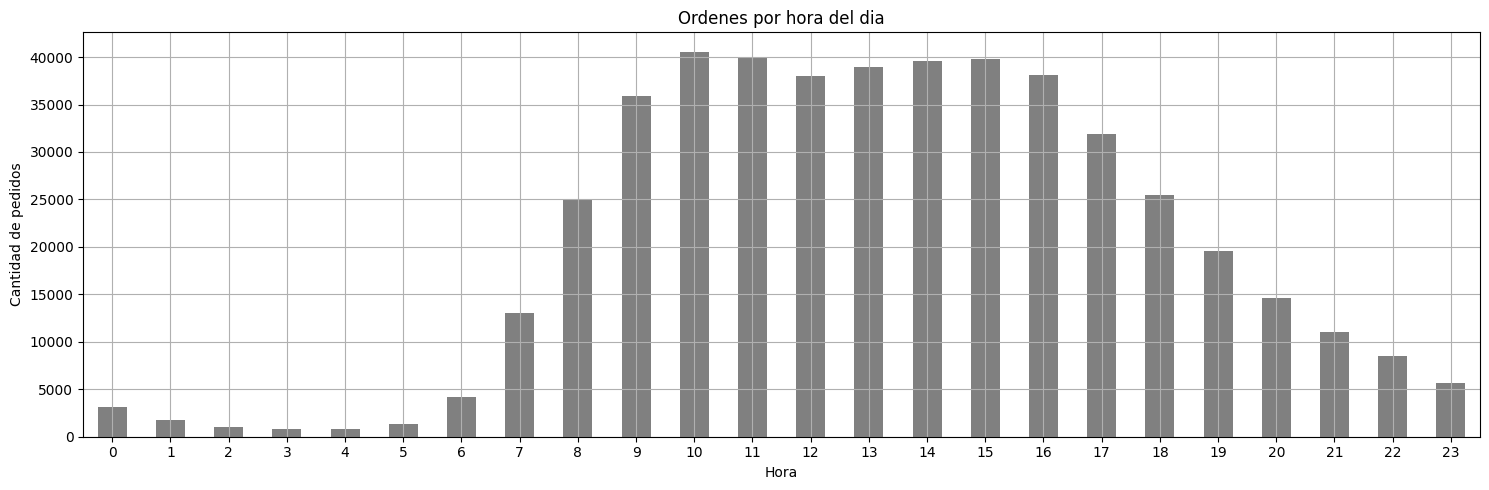

In [35]:
df_orders_by_hour = df_instacart_orders.groupby('order_hour_of_day')['order_id'].count()
df_orders_by_hour.plot(kind='bar', 
                       title='Ordenes por hora del dia', 
                       xlabel="Hora", 
                       ylabel="Cantidad de pedidos", 
                       grid=True, 
                       rot=0, 
                       figsize=[15, 5], 
                       color='grey')
plt.tight_layout()
plt.show()

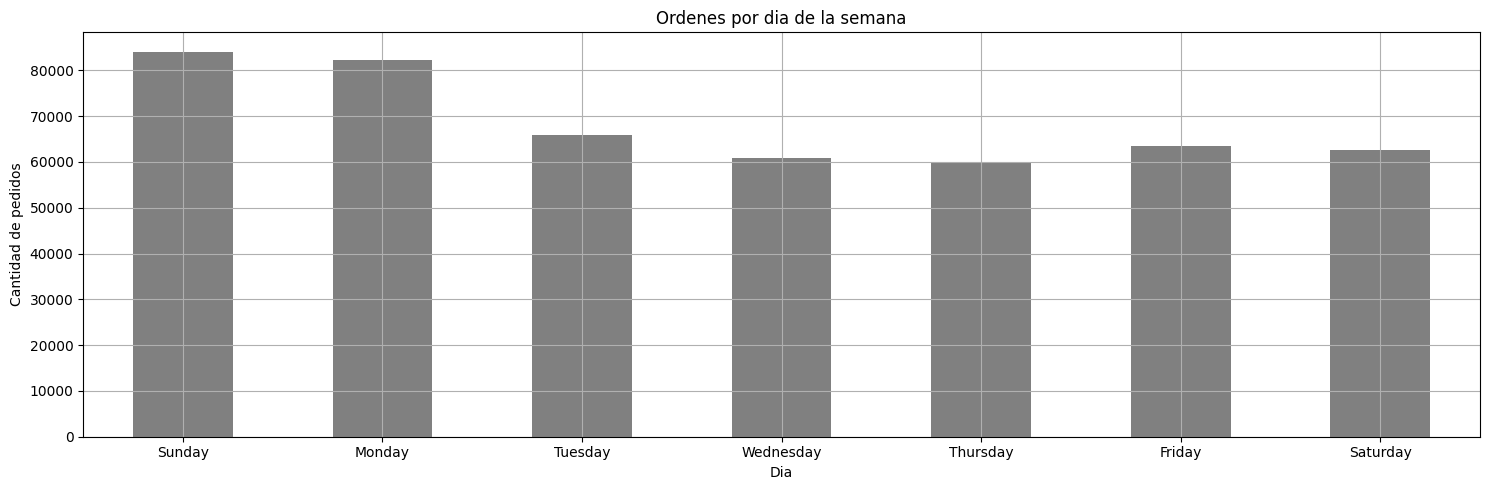

In [36]:
df_orders_by_day = df_instacart_orders.groupby('order_dow')['order_id'].count()
df_orders_by_day.index = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

df_orders_by_day.plot(kind='bar', 
                       title='Ordenes por dia de la semana', 
                       xlabel="Dia", 
                       ylabel="Cantidad de pedidos", 
                       grid=True, 
                       rot=0, 
                       figsize=[15, 5], 
                       color='grey')
plt.tight_layout()
plt.show()

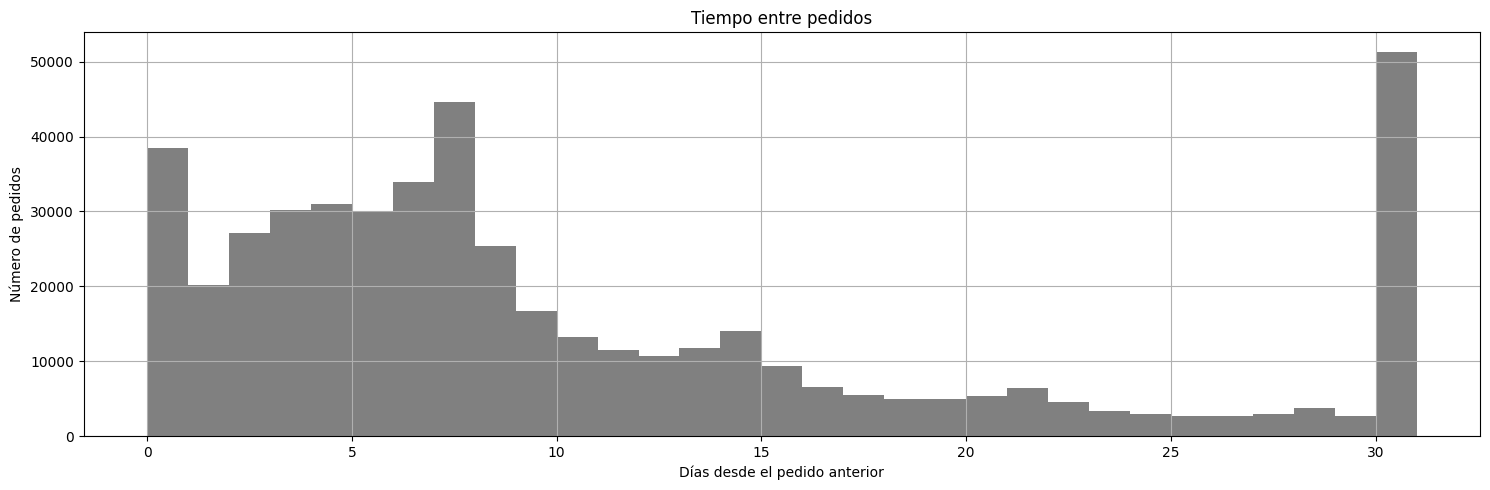

In [37]:

df_instacart_orders.hist(column='days_since_prior_order', 
                         bins=range(0, 32),
                         grid=True,
                         figsize=[15, 5], 
                         color='grey')
plt.title('Tiempo entre pedidos')
plt.xlabel('Días desde el pedido anterior')
plt.ylabel('Número de pedidos')
plt.tight_layout()
plt.show()

Escribe aquí tus conclusiones
###### _LSPL_
- Para la creacion de graficas número de personas que hacen pedidos dependiendo de la hora del día y día de la semana en que la gente hace sus compras.
Se escogio grafico de barras vertical, porque permite identificar comportamientos de usuarios en función de la hora o el dia.

En Ordenes por hora del dia, se ve marcado las horas activas de las personas donde se generan mas ordenes (07:00 a 21:00) y las horas de descanso donde decae el numero de ordenes (22:00 a 06:00). 

En ordenes por dia de la semana, se muestra que entre el Domingo y el Lunes es cuando ocurren el mayor numero de orednes.

- Para la creacion de graficas que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, se escogio el histograma, ya que muestra distribución de frecuencias, cuántas personas esperaron 1 día, 2 días, 3 días, etc.

__Nota__ para la grafica de los dias de la semana, de acuerdo a las costumbres norte americanas, los dias de la semana inician los Domingos, por lo que el valor 0 seria para el Domingo.



### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

In [38]:
print(df_orders_by_hour)

order_hour_of_day
0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_id, dtype: int64


Escribe aquí tus conclusiones
###### _LSPL_

Hora en que se generan mas ordenes es a las 10 am. De 07 am a 09 pm es el horario regular de generacion de ordenes (por arriba de las 10K ordenes). 10 pm a 06 am es el periodo de tiempo con ventas mas bajas debido a las horas de descanso de las personas (por debajo de las 10K ordenes).

### [A3] ¿Qué día de la semana compran víveres las personas?

In [39]:
print(df_orders_by_day)
print()
print(f"El día de la semana con más pedidos: {df_orders_by_day.idxmax()}")

Sunday       84090
Monday       82185
Tuesday      65833
Wednesday    60897
Thursday     59810
Friday       63488
Saturday     62649
Name: order_id, dtype: int64

El día de la semana con más pedidos: Sunday


Escribe aquí tus conclusiones
###### LSPL

Domingo y Lunes son los dias con mayor volumen de pedidos, probablemente patron semanal de compra usados para el reabastecimiento de viveres.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

In [40]:
print(f"Valor mínimo de días de espera: {df_instacart_orders['days_since_prior_order'].min()}")
print(f"Valor máximo de días de espera: {df_instacart_orders['days_since_prior_order'].max()}")

Valor mínimo de días de espera: 0
Valor máximo de días de espera: 30


Escribe aquí tus conclusiones
###### _LSPL_
Valor mínimo: 0 días, generado por valores ausentes, lo cual indica que existen en aquellos dias en los que los usuarios compraron ese mismo dia.

Valor máximo: probablemente 30 días → muchos usuarios programan sus pedidos mensualmente.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [41]:
df_wnd_sat = df_instacart_orders[df_instacart_orders['order_dow'].isin([3, 6])]
display(df_wnd_sat.sample(25).style.apply(zebra_rows, axis=1))

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
290517,598482,57338,3,6,15,22
22679,1730317,170365,35,6,17,14
107724,779123,26441,8,6,1,10
174179,1508262,38008,15,3,12,6
272578,514058,23768,29,6,11,7
298108,619432,72221,24,6,18,6
53195,3277593,18934,2,6,16,4
98628,2008474,36190,35,3,7,2
92446,1802567,37986,8,3,16,12
198014,718421,98203,4,6,14,9


In [42]:
# Filtrar solo miércoles y sábado
df_dy_hr = df_wnd_sat.pivot_table(index='order_hour_of_day',
                                  columns='order_dow',
                                  values='order_id',
                                  aggfunc='count')
display(df_dy_hr.head(25).style.apply(zebra_rows, axis=1))


order_dow,3,6
order_hour_of_day,,
0,373,464
1,215,254
2,106,177
3,101,125
4,108,118
5,170,161
6,643,451
7,1732,1619
8,3125,3246


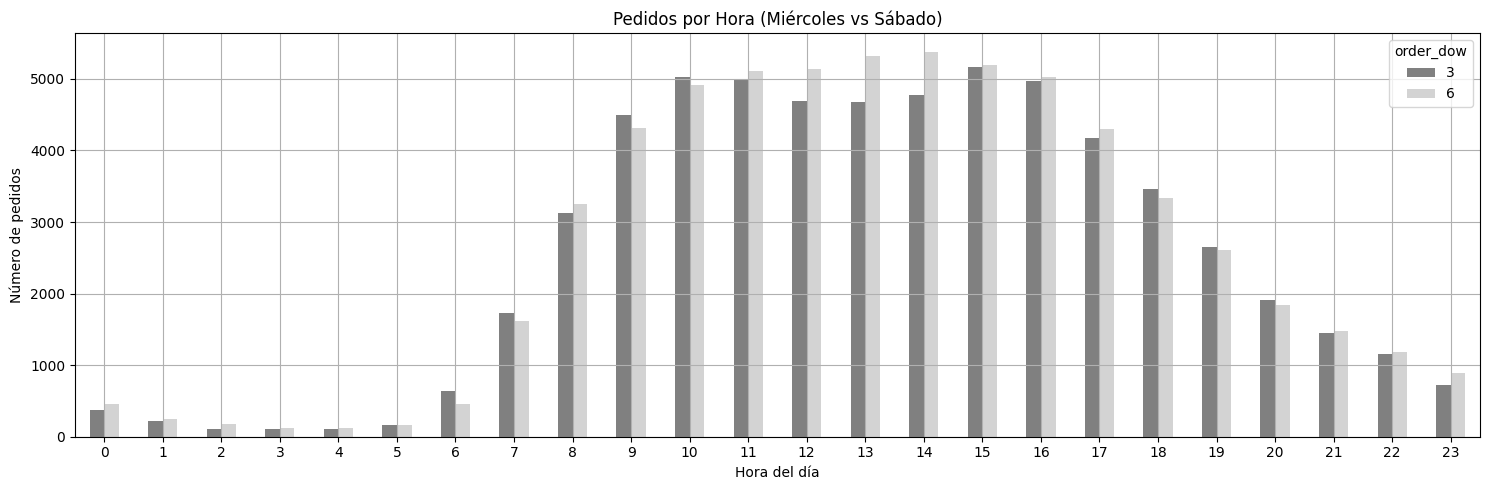

In [43]:
df_dy_hr.plot(kind='bar',
              title='Pedidos por Hora (Miércoles vs Sábado)',
              xlabel='Hora del día',
              ylabel='Número de pedidos',
              grid=True,
              rot=0,
              figsize=[15, 5],
              color=['grey', 'lightgrey'])
plt.tight_layout()
plt.show()

Escribe aquí tus conclusiones
###### _LSPL_

Existen ciertas diferencias en la distribucion de los pedidos por hora para Miercoles y Sabados.

Miercoles:

- Hora en que se generan mas ordenes es a las 03 pm. De 07 am a 10 pm es el horario regular de generacion de ordenes (por arriba de las 10K ordenes). 11 pm a 06 am es el periodo de tiempo con ventas mas bajas debido a las horas de descanso de las personas (por debajo de las 10K ordenes). Incluso se puede ver una caida de ordenes entre las 12 y las 02 pm.

- Hora en que se generan mas ordenes es a las 02 pm. De 07 am a 10 pm es el horario regular de generacion de ordenes (por arriba de las 10K ordenes). 11 pm a 06 am es el periodo de tiempo con ventas mas bajas debido a las horas de descanso de las personas (por debajo de las 10K ordenes). Los sabados no presentan caidas en el numero de ordenes durante el dia. 

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [44]:
# contar cuántos pedidos ha hecho cada usuario
user_orders = df_instacart_orders['user_id'].value_counts()
print(f"Cantidad de pedidos por cada usuario: \n {user_orders}")
print()

# Contamos cuántos usuarios hay para cada cantidad de pedidos
user_per_amount_orders = user_orders.value_counts().sort_index()
print(f"Numero de clientes por cantidad de pedidos: \n{user_per_amount_orders}")

Cantidad de pedidos por cada usuario: 
 user_id
149605    28
193164    26
78375     25
134511    24
148162    24
          ..
73221      1
112002     1
82546      1
60017      1
133649     1
Name: count, Length: 157437, dtype: int64

Numero de clientes por cantidad de pedidos: 
count
1     55357
2     36508
3     21547
4     13498
5      8777
      ...  
23       19
24        3
25        1
26        1
28        1
Name: count, Length: 27, dtype: int64


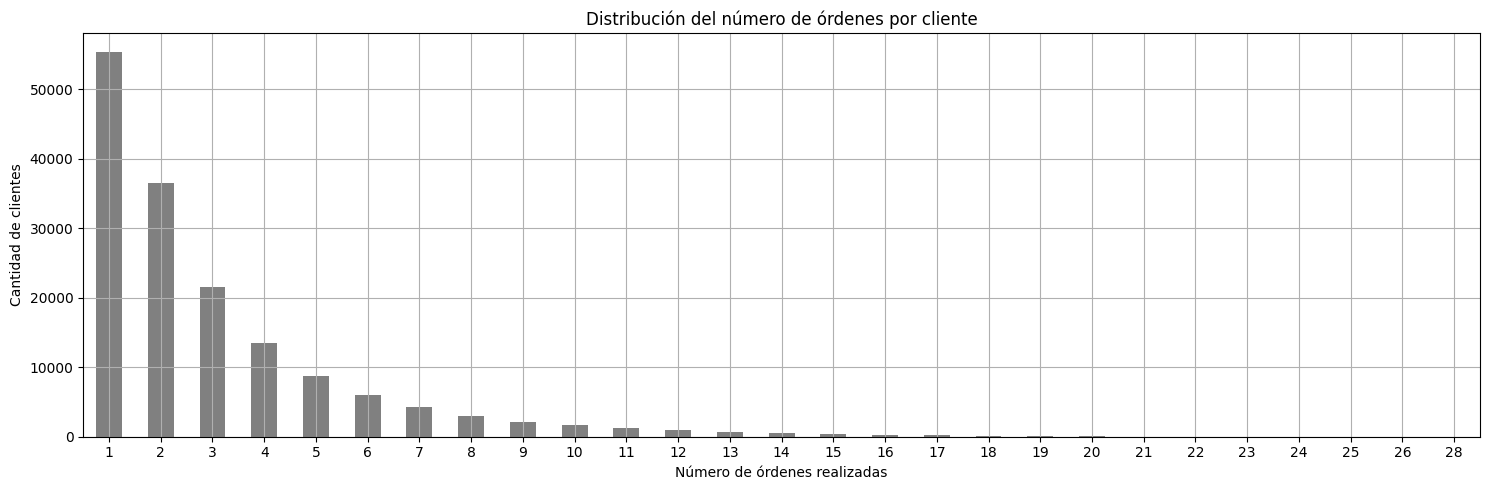

In [45]:
user_per_amount_orders.plot(
    kind='bar',
    title='Distribución del número de órdenes por cliente',
    xlabel='Número de órdenes realizadas',
    ylabel='Cantidad de clientes',
    grid=True,
    figsize=[15,5],
    rot=0,
    color='grey')
plt.tight_layout()
plt.show()

Escribe aquí tus conclusiones
###### _LSPL_
Se puede visualizar la tendencia del numero de compras que hacen la mayor parte de los clientes, muchos clientes compran una sola vez o hacen pocos pedidos, y pocos clientes son los que hacen muchos pedidos.


### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [46]:
# Contar cuántas veces se pidió cada producto
df_most_ordered_products = df_order_products['product_id'].value_counts().reset_index()
df_most_ordered_products.columns = ['product_id', 'order_amounts']

display(df_most_ordered_products.sample(25).style.apply(zebra_rows, axis=1))

,product_id,order_amounts
38863,4490,2
11732,39823,40
27772,26704,6
2827,31015,278
10912,44166,45
17228,12547,19
22820,25236,10
16841,41858,20
17454,2035,19
37569,44309,2


In [47]:
# Unir con el DataFrame de productos para traer el nombre
df_top_prods = df_most_ordered_products.merge(df_products, on='product_id', how='left')

display(df_top_prods.sample(25).style.apply(zebra_rows, axis=1))

,product_id,order_amounts,product_name,aisle_id,department_id
130,31343,3787,shredded_mild_cheddar_cheese,21,16
42027,4012,1,orange_decorating_icing,97,13
23132,14208,10,unknown,100,21
17913,37190,18,krinkle_cut_buffalo_bleu_potato_chips,107,19
10921,17331,45,coconut_oil_kettle_cooked_potato_chips_sea_salt,107,19
34758,38932,3,herbal_tea__acai_mango_zinger__caffeine_free__tea_bags,94,7
30151,44339,5,roasted_sweet_red_peppers_in_vinegar,81,15
11240,7456,43,unknown,100,21
17656,17906,18,organic_super_maxi_pads,126,11
5816,4913,117,table_water_crackers,78,19


In [48]:
df_top_twenty = df_top_prods[['product_id', 'product_name', 'order_amounts']]

display(df_top_twenty.head(20).style.apply(zebra_rows, axis=1))

,product_id,product_name,order_amounts
0,24852,banana,66050
1,13176,bag_of_organic_bananas,53297
2,21137,organic_strawberries,37039
3,21903,organic_baby_spinach,33971
4,47209,organic_hass_avocado,29773
5,47766,organic_avocado,24689
6,47626,large_lemon,21495
7,16797,strawberries,20018
8,26209,limes,19690
9,27845,organic_whole_milk,19600


Escribe aquí tus conclusiones
###### LSPL
Se muestran los productos del top 20, de los cuales se podrian catalogar como los viveres de uso mas comun.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [49]:
items_per_order = df_order_products.groupby('order_id').size()

print("Numero de artículos por pedido: \n",items_per_order.sample(25))


Numero de artículos por pedido: 
 order_id
2644568     9
2144491    11
900922     14
2605442    10
2683186     8
166370      3
2355707     9
1288680    20
958863      9
578608      5
3167435    19
1426802    10
2123971    11
1563461    10
1327151    10
2519579     6
2498025     7
1920604    10
1182157     8
1572440    10
3356345    11
837987      4
3379221    36
1262453    18
2917015     7
dtype: int64


In [50]:
print("Estadisticas de objetos por pedido: \n", items_per_order.describe())


Estadisticas de objetos por pedido: 
 count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
dtype: float64


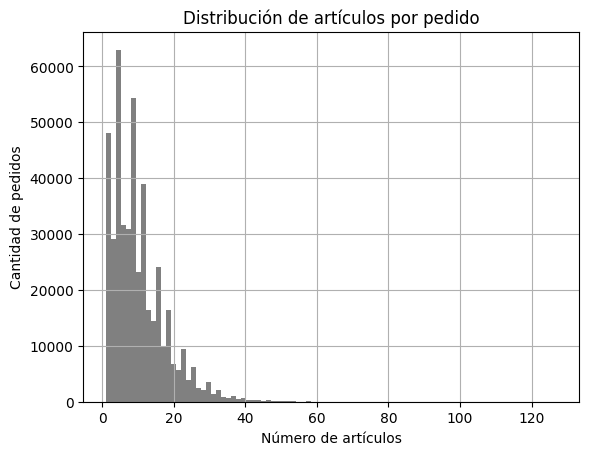

<Figure size 1500x500 with 0 Axes>

In [51]:
plt.hist(items_per_order, bins=90, color='grey')
plt.title('Distribución de artículos por pedido')
plt.xlabel('Número de artículos')
plt.ylabel('Cantidad de pedidos')
plt.grid(True)
plt.figure(figsize=(15, 5))
plt.tight_layout()
plt.show()

Escribe aquí tus conclusiones
###### LSPL

El minimo numero de articulos por pedido es: 1
El maximo numero de articulos por pedido es: 127
El numero promedio de articulos por pedido es: 10 (El std es bajo por lo que la medida de la media es confiable)

Entre memnos articulos mas cantidad de pedidos, entre mas cantidad de articulos menos cantidad de pedidos. (De acuerdo a la tendencia normal de la adquisicion de compra)


### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [52]:
df_reordered_products = df_order_products[df_order_products['reordered'] == 1]
display(df_reordered_products.sample(25).style.apply(zebra_rows, axis=1))

,order_id,product_id,add_to_cart_order,reordered
1257125,1018072,20804,6,1
3919597,257946,7693,1,1
4130171,2490245,30233,6,1
4273198,3259630,27104,4,1
433278,2970448,18811,2,1
1322425,2120812,13885,24,1
851751,1992780,46979,25,1
2439334,3205525,35221,6,1
4360339,2481210,14870,2,1
900322,1725599,10621,6,1


In [53]:
df_top_20_ro = df_reordered_products['product_id'].value_counts().head(20)
print("Top 20 productos vueltos a ordenar: ", df_top_20_ro)

Top 20 productos vueltos a ordenar:  product_id
24852    55763
13176    44450
21137    28639
21903    26233
47209    23629
47766    18743
27845    16251
47626    15044
27966    14748
16797    13945
26209    13327
22935    11145
24964    10411
45007    10076
49683     9538
28204     8989
8277      8836
39275     8799
5876      8412
49235     8389
Name: count, dtype: int64


In [54]:
# Cruzar IDs con nombres
df_top_20_names = df_top_20_ro.to_frame(name='reorder_count').merge(df_products[['product_id', 'product_name']],left_index=True,right_on='product_id').reset_index(drop=True)
df_top_20_names = df_top_20_names.sort_values(by='reorder_count', ascending=True)
print(df_top_20_names[['product_id', 'product_name', 'reorder_count']])

    product_id    product_name  reorder_count
19       49235  organic_hal...           8389
18        5876   organic_lemon           8412
17       39275  organic_blu...           8799
16        8277  apple_honey...           8836
15       28204  organic_fuj...           8989
14       49683  cucumber_kirby           9538
13       45007  organic_zuc...          10076
12       24964  organic_garlic          10411
11       22935  organic_yel...          11145
10       26209           limes          13327
9        16797    strawberries          13945
8        27966  organic_ras...          14748
7        47626     large_lemon          15044
6        27845  organic_who...          16251
5        47766  organic_avo...          18743
4        47209  organic_has...          23629
3        21903  organic_bab...          26233
2        21137  organic_str...          28639
1        13176  bag_of_orga...          44450
0        24852          banana          55763


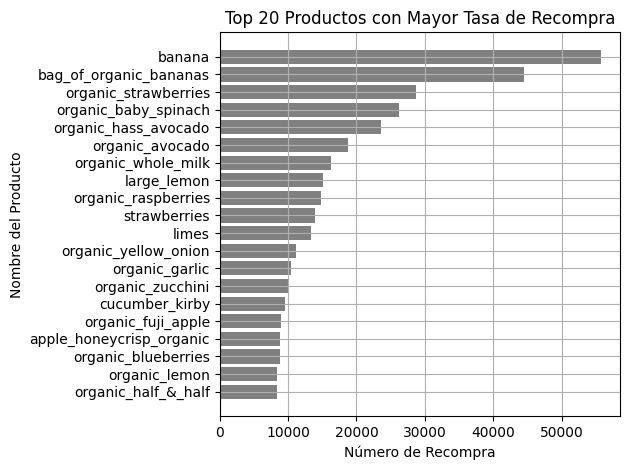

In [55]:
plt.barh(y=df_top_20_names['product_name'], width=df_top_20_names['reorder_count'], color='grey')
plt.xlabel('Número de Recompra')
plt.ylabel('Nombre del Producto')
plt.title('Top 20 Productos con Mayor Tasa de Recompra')
plt.grid(True)
plt.Figure(figsize=(15,5))
plt.tight_layout()
plt.show()

Escribe aquí tus conclusiones
###### LSPL

Para poder obtener los 20 productos con mayor tasa de recompra, se tuvo que obtener la informacion de varios DataSets, como DataFrame [order_products], columna 'reordered', que es de donde se tiene la informacion de los productos que son vueltos a comprar; deste mismo DataFrame basandonos en la columna 'product_id' se obtuvo una serie con el total de numero de recompras del producto; esta serie se fusiono con el DataFrame [products], columnas 'product_id' y 'product_name' para despues usarlo en una grafica de barras horizontal y mostrar el top 20 de los productos con mayor tasa de compra.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [56]:
# Total de pedidos por producto
total_orders = df_order_products.groupby('product_id').size()
print("Ordenes totales: \n", total_orders)

Ordenes totales: 
 product_id
1        280
2         11
3         42
4         49
7          2
        ... 
49690      5
49691     72
49692     12
49693     25
49694      9
Length: 45573, dtype: int64


In [57]:
# Total de recompras por producto
total_reorders = df_order_products[df_order_products['reordered'] == 1].groupby('product_id').size()
print("Total de recompras por producto \n", total_reorders)

Total de recompras por producto 
 product_id
1        158
3         31
4         25
7          1
8          6
        ... 
49690      4
49691     31
49692      5
49693     11
49694      3
Length: 36228, dtype: int64


In [59]:
# Tasa de repetición
reorder_rate = (total_reorders / total_orders)
print()
# Producto que no aparece en total_reorders, no hay valor para hacer la division
reorder_rate = (total_reorders / total_orders).fillna(0)
print()
print("Taza de recompra: \n", reorder_rate)
print()
# Asignacion de product_id como columna 
reorder_rate = reorder_rate.reset_index()
reorder_rate.columns = ['product_id', 'reorder_rate']
print("Taza de reorden: \n", reorder_rate)
print()

# Cruzamos para ver nombres
reorder_rate = reorder_rate.merge(df_products[['product_id', 'product_name']], on='product_id')
print("Taza de reorden: \n", reorder_rate.head(25).sort_values(by='reorder_rate', ascending=False))



Taza de recompra: 
 product_id
1        0.564286
2        0.000000
3        0.738095
4        0.510204
7        0.500000
           ...   
49690    0.800000
49691    0.430556
49692    0.416667
49693    0.440000
49694    0.333333
Length: 45573, dtype: float64

Taza de reorden: 
        product_id  reorder_rate
0               1      0.564286
1               2      0.000000
2               3      0.738095
3               4      0.510204
4               7      0.500000
...           ...           ...
45568       49690      0.800000
45569       49691      0.430556
45570       49692      0.416667
45571       49693      0.440000
45572       49694      0.333333

[45573 rows x 2 columns]

Taza de reorden: 
     product_id  reorder_rate    product_name
6            9      0.761905  light_straw...
2            3      0.738095  robust_gold...
19          25      0.674576  salted_cara...
20          26      0.673077  fancy_feast...
24          30      0.666667  three_chees...
8           11     

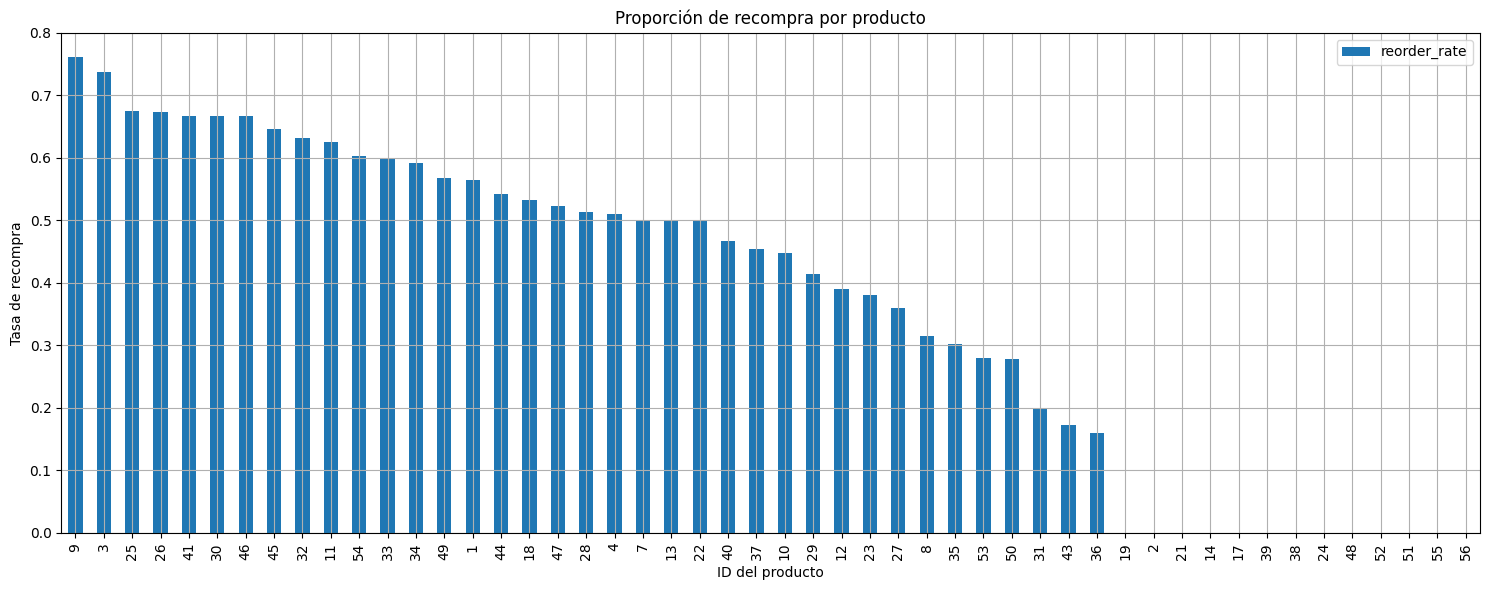

In [66]:
reorder_rate.head(50).sort_values(by='reorder_rate', ascending=False).plot(kind='bar', x='product_id', y='reorder_rate', figsize=(15,6))
plt.title('Proporción de recompra por producto')
plt.xlabel('ID del producto')
plt.ylabel('Tasa de recompra')
plt.grid(True)
plt.tight_layout()
plt.show()

Escribe aquí tus conclusiones
###### LSPL

La proporcion es la relacion entre dos cantidades que muestra cuanto representa una parte respecto a un todo.
Por lo que para sacar la proporcion de los pedidos y pedidos vueltos a comprar por cada producto, la proporcion esta dada por recompras / compras esto nos da como resultado la proporcion o tasa de recompra.
Para poder identificar el nombre del producto y mostrarlo junto a la proporcion de recompra, se fusiona el DataFrame [reorder_rate] con el DataFrame [products], con la columna ancla 'product_id'.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [67]:
#  Hay que juntar order_products y instacart_orders para saber quién es el user_id

# Unir productos con pedidos para tener user_id
df_order_products_users = df_order_products.merge(df_instacart_orders[['order_id', 'user_id']], on='order_id')
display(df_order_products_users.sample(25).style.apply(zebra_rows, axis=1))
print()

# Total de productos pedidos por usuario
total_user_orders = df_order_products_users.groupby('user_id').size()
print(total_user_orders.sample(25))
print()

# Total de productos reordenados por usuario
total_user_reorders = df_order_products_users[df_order_products_users['reordered'] == 1].groupby('user_id').size()
print(total_user_reorders.sample(25))


,order_id,product_id,add_to_cart_order,reordered,user_id
1814290,2206687,41665,12,1,66888
1460246,586858,12859,1,1,91472
1029345,2800557,28842,3,0,78136
3381076,703757,1194,1,1,39000
2763745,2889098,11634,12,0,76672
1615203,1976194,13272,2,0,71295
256419,2820443,42768,2,1,30361
4511967,161618,436,18,1,119988
4525295,1230519,24852,6,1,99727
2731036,1154551,40777,9,0,37437



user_id
145165     21
130987     48
3494       11
37703       9
158567      7
176700     59
121590      5
149101      5
180217     49
162304     27
92997      12
189077     12
196516     27
74629      12
117587     21
120792     12
89763       8
40909      16
89993     102
161432     69
10529      26
115368      4
191096      3
26500       8
102921      6
dtype: int64

user_id
39492     29
69557     11
70095     10
10389      6
104413    31
173812    15
83548      5
203985     4
70449     24
5417      15
132778     7
157944     6
152710    20
103018    29
36233      8
115065    33
88022      5
1452       2
116504    46
58912      1
186640     3
52869     12
7879       1
123946     7
199575    54
dtype: int64


In [70]:
# Tasa de repetición por usuario
user_reorder_rate = (total_user_reorders / total_user_orders).fillna(0).reset_index()
user_reorder_rate.columns = ['user_id', 'user_reorder_rate']

print("Tasa de repeticion por usuario: \n", user_reorder_rate.head(50).sort_values(by='user_reorder_rate', ascending=False))

Tasa de repeticion por usuario: 
     user_id  user_reorder_rate
15       22        1.000000   
48       68        1.000000   
4         7        0.928571   
20       29        0.846154   
49       69        0.800000   
..      ...             ...   
3         6        0.000000   
21       30        0.000000   
24       34        0.000000   
38       57        0.000000   
46       66        0.000000   

[50 rows x 2 columns]


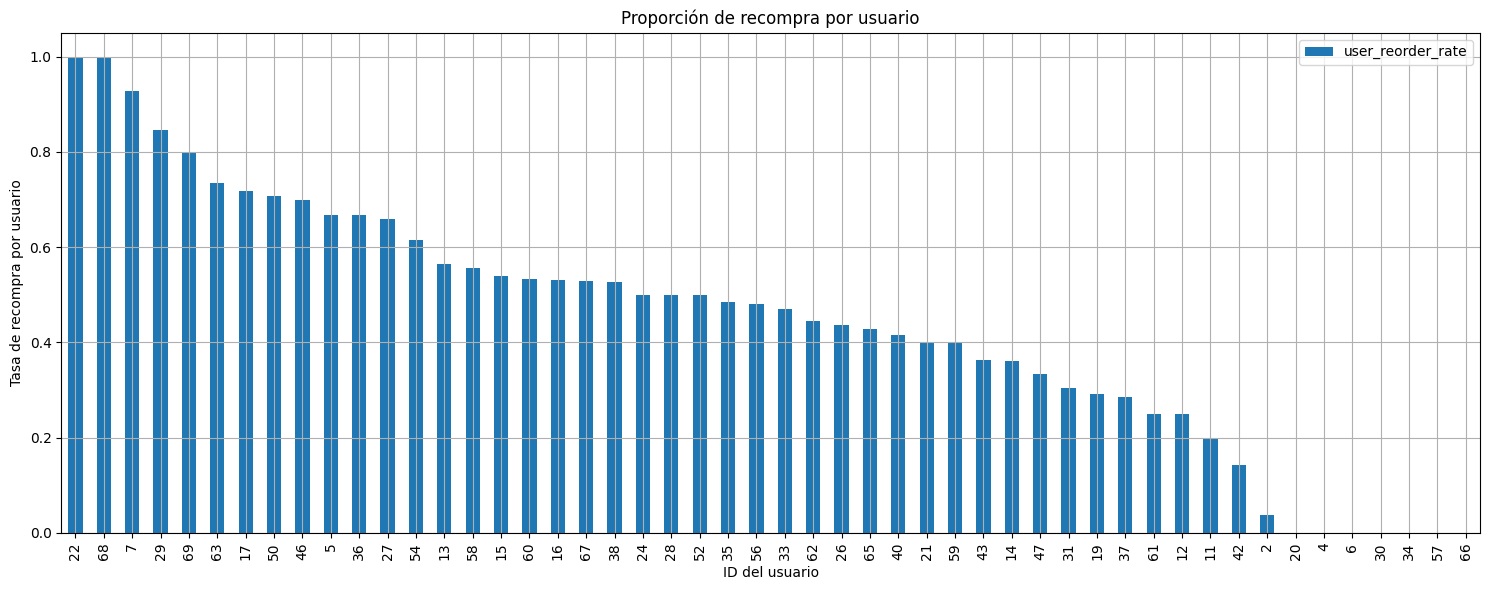

In [73]:
user_reorder_rate.head(50).sort_values(by='user_reorder_rate', ascending=False).plot(kind='bar', x='user_id', y='user_reorder_rate', figsize=(15,6))
plt.title('Proporción de recompra por usuario')
plt.xlabel('ID del usuario')
plt.ylabel('Tasa de recompra por usuario')
plt.grid(True)
plt.tight_layout()
plt.show()

Escribe aquí tus conclusiones

###### LSPL

Se aplicaron casi las mismas consideraciones que [C3], pero esta vez para el usuario.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [74]:
# Filtrar los primeros productos añadidos
df_first_products = df_order_products[df_order_products['add_to_cart_order'] == 1]
display(df_first_products.head(25).style.apply(zebra_rows, axis=1))

,order_id,product_id,add_to_cart_order,reordered
1,567889,1560,1,1
2,2261212,26683,1,1
14,1961225,37553,1,1
16,639939,10017,1,1
23,750040,8518,1,0
33,2291457,27104,1,1
43,3075384,28799,1,1
45,1787676,47672,1,1
54,3266094,12763,1,1
56,1594605,34217,1,1


In [75]:
# Contar los productos más añadidos primero
top_20_first_added = df_first_products['product_id'].value_counts().head(20)
print("Cantidad de los productos mas añadidos primero: \n", top_20_first_added )

Cantidad de los productos mas añadidos primero: 
 product_id
24852    15562
13176    11026
27845     4363
21137     3946
47209     3390
21903     3336
47766     3044
19660     2336
16797     2308
27966     2024
44632     1914
49235     1797
47626     1737
196       1733
38689     1397
26209     1370
12341     1340
5785      1310
27086     1309
22935     1246
Name: count, dtype: int64


In [76]:
# Cruzar IDs con nombres
top_20_first_added = top_20_first_added.to_frame(name='first_added_count').merge(df_products[['product_id', 'product_name']], 
                                                                                 left_index=True, right_on='product_id')

print(top_20_first_added[['product_id', 'product_name', 'first_added_count']])

       product_id    product_name  first_added_count
24851       24852          banana           15562   
13175       13176  bag_of_orga...           11026   
27844       27845  organic_who...            4363   
21136       21137  organic_str...            3946   
47208       47209  organic_has...            3390   
21902       21903  organic_bab...            3336   
47765       47766  organic_avo...            3044   
19659       19660    spring_water            2336   
16796       16797    strawberries            2308   
27965       27966  organic_ras...            2024   
44631       44632  sparkling_w...            1914   
49234       49235  organic_hal...            1797   
47625       47626     large_lemon            1737   
195           196            soda            1733   
38688       38689  organic_red...            1397   
26208       26209           limes            1370   
12340       12341   hass_avocados            1340   
5784         5785  organic_red...            1

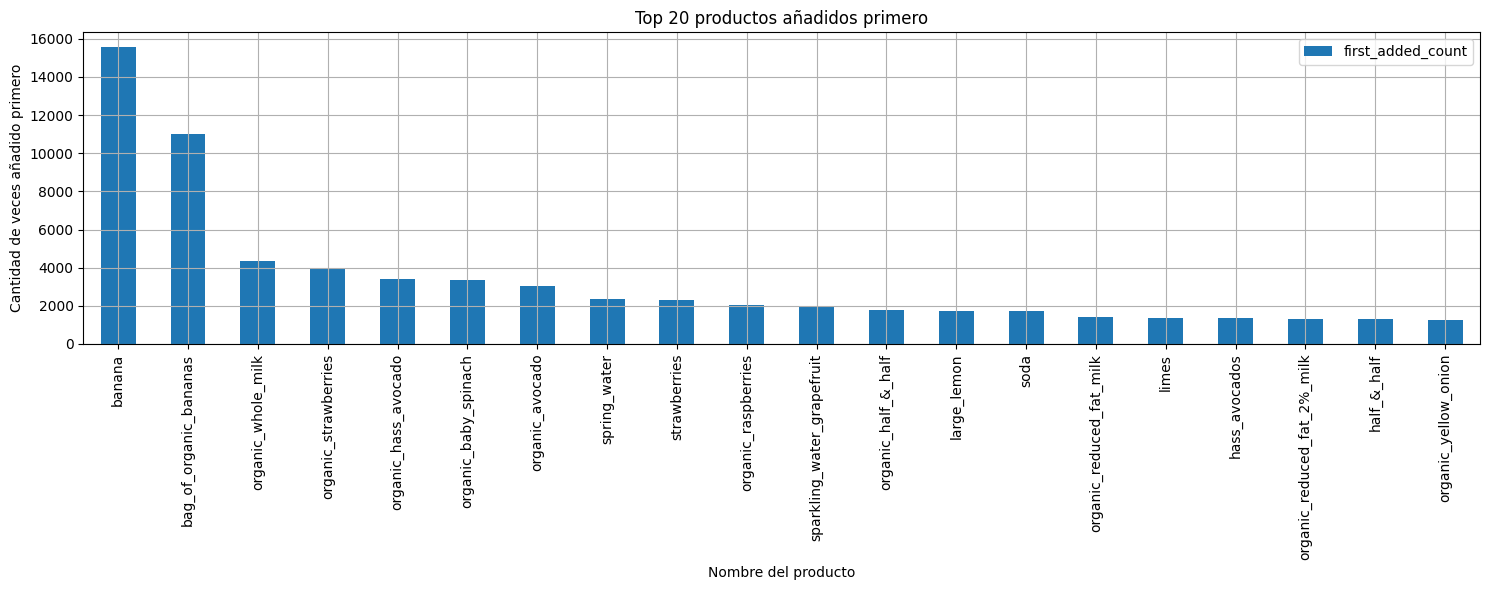

In [77]:
top_20_first_added[['product_id', 'product_name', 'first_added_count']].sort_values(by='first_added_count', ascending=False).plot(kind='bar', x='product_name', y='first_added_count', figsize=(15,6))
plt.title('Top 20 productos añadidos primero')
plt.xlabel('Nombre del producto')
plt.ylabel('Cantidad de veces añadido primero')
plt.grid(True)
plt.tight_layout()
plt.show()

Escribe aquí tus conclusiones
###### LSPL

Los datos indican que ciertos productos se agregan con mucha mayor frecuencia como primera elección en el carrito de compras, destacando particularmente la banana y la bolsa de bananas orgánicas, que lideran por amplio margen. 

Además, se observa una alta preferencia por productos orgánicos y frescos, lo cual puede reflejar un perfil de consumidor más consciente de la salud. 

### Conclusion general del proyecto:

In [ ]:
##### ✅ Observaciones

- Analisis de pedidos por hora y dia de la semana:

El análisis por hora del día muestra que las órdenes se concentran entre las 7:00 a.m. y las 9:00 p.m., con un pico a las 10:00 a.m..

Por día de la semana, los usuarios hacen más pedidos entre domingo y lunes, indicando un patrón recurrente de compras semanales al inicio de la semana.

El histograma de días entre pedidos revela que muchas personas hacen pedidos cada 1 a 7 días, reflejando un comportamiento de recompra frecuente o semanal.

- Distribución del número de pedidos por cliente:

La mayoría de los clientes realizaron sólo 1 pedido.

A medida que aumenta el número de pedidos por usuario, la cantidad de usuarios disminuye drásticamente.

Casos excepcionales de usuarios con 25 a 28 pedidos (clientes altamente fieles) son sin duda minoría.

- Productos añadidos primero al carrito:

Productos como banana, organic bananas y organic whole milk son los más añadidos en primer lugar al carrito.

Se nota una fuerte preferencia por productos frescos y orgánicos.

Esto sugiere patrones de consumo guiados por la salud o hábitos consistentes.

- Artículos por pedido:
    
El promedio de artículos por pedido es 10, con un máximo de 127 y mínimo de 1.

La mayoría de los pedidos contienen entre 5 y 14 productos, representando compra estándar.

- Productos más vueltos a pedir:

El producto con mayor número de reordenes es banana, seguido por múltiples productos orgánicos y frescos como fresas, limones y aguacates.

Hay un claro patrón de recompra en artículos básicos y saludables.

- Recompra por producto:
    
Los productos con mayor proporción de recompra tienen mas pedidos repetidos.

- Productos más frecuentes al inicio del carrito:
    
Se identificaron los artículos que más frecuentemente son los primeros en ser añadidos al carrito.

Los productos frescos como bananas y leche orgánica aparecen como generadores de compra.

- Reordenamiento vs. posición en carrito:

Los productos que se agregan primero al carrito tienen mayor probabilidad de ser reordenados, indicando su valor central en el hábito de compra del usuario.

##### ✅ Conclusiones

El comportamiento de compra está claramente vinculado a rutinas diarias y semanales: los usuarios compran principalmente durante horas laborales diurnas y los fines de semana/inicio de semana.

El análisis sugiere que el servicio se utiliza con frecuencia como parte de una rutina de reabastecimiento semanal.

Instacart tiene una base de usuarios con el siguiente comportamiento: muchos compran una sola vez, pocos se vuelven clientes frecuentes.

Los productos que se agregan primero al carrito pueden funcionar como generadores de compra para el resto de los productos.

El comportamiento de compra está altamente influenciado por productos esenciales y frescos, los cuales tienden a ser reordenados.

La frecuencia de recompra y el orden de agregación ofrecen señales sobre los hábitos del cliente y la importancia del producto.


##### ✅ Recommendations

Aprovechar las horas pico (7:00 a.m. a 10:00 a.m.) y los días de alta demanda (domingo y lunes) para promociones o recomendaciones.

Considerar notificaciones automáticas o recordatorios entre 5 y 7 días después del último pedido para incentivar la recompra.

Segmentar usuarios según su frecuencia de compra (cada X días) para diseñar planes de fidelización o automatizar listas de compras sugeridas.

Implementar estrategias de retención temprana: ofertas o cupones en el segundo o tercer pedido para aumentar la recurrencia.

Identificar a los usuarios con potencial de convertirse en leales y aplicarles campañas de fidelización personalizadas.

Priorizar en la app/producto los artículos más comúnmente añadidos primero para acelerar la conversión.

Usar estos productos como base para recomendaciones inteligentes o bundles iniciales.

Experimentar con campañas de marketing centradas en productos “primeros del carrito” para aumentar engagement y ticket promedio.

Optimizar la experiencia de recompra destacando productos con alta tasa de repetición en la interfaz (por ejemplo, "tus más pedidos").

Priorizar productos que aparecen primero en el carrito como parte de una lista inteligente sugerida para nuevos pedidos.

Aplicar modelos de predicción de recompra considerando tanto el orden de adición al carrito como el historial de reordenes.

Ofrecer descuentos selectivos en productos que se agregan al inicio del carrito para aumentar el valor promedio del ticket.